# Pandas
Pandas est une librairie offrant les outils pour travailler avec des données tabulaires (tableaux) depuis différentes sources de documents (Excel, txt...) ou bases de données. C'est la librairie de prédilection pour la manipulation et nettoyage de vos données ainsi que la réalisation de premières analyses.
<br>Pandas est construit à partir de NumPy et le format des données est compatible avec bien d'autres librairies de calculs scientifiques.

In [1]:
import pandas as pd
import numpy as np

## 1. Series et Dataframes

### 1.1 Series

In [ ]:
#Liste
pd.Series(data=[1, 2, 3, 4])
pd.Series(data=[1, 2, 3, 4], index=['a', 'b', 'c', 'd'])

#Array NumPy
pd.Series(data=np.array([1, 2, 3, 4]), index=['a', 'b', 'c', 'd'])

#Dictionnaire
ser_1 = pd.Series({'a': 1, 'b': 2, 'c': 3, 'd': 4})
ser_1

In [ ]:
np.add(ser_1, 10)
ser_1 * ser_1

### 1.2 Dataframes

In [ ]:
pd.DataFrame(data=ser_1, columns=['col_A'])
pd.DataFrame(np.random.randint(15, 120, (4, 7)))
pd.DataFrame(np.random.randint(15, 120, (4, 7)), columns=[f'Var_{i}' for i in range(7)])
pd.DataFrame([1, 2, 3, 4], columns=['col_A'], index=[10, 22, 3, 65])

pd.DataFrame([ser_1, ser_1]).T

#Dictionnaire
pd.DataFrame({'col_A': ser_1, 'col_B': ser_1})
pd.DataFrame({'col_A': pd.Series(np.random.randint(3, 18, 4)),
              'col_B': pd.Series(np.random.randint(100, 1000, 8))})

dict_1 = {'Nom': 'Dupont', 'Sport': 'Rugby', 'age': 27}
pd.DataFrame([dict_1]) #Quand le dictionnaire contient une unique valeur par clé

dict_1b = {'Nom': pd.Series('Dupont'), 'Sport': pd.Series('Rugby'), 'age': pd.Series(27)}
pd.DataFrame(dict_1b)

dict_2 = {'Nom': ['Dupont', 'Marchand'], 'Sport': ['Rugby', 'Natation'], 'age': [27, 22]}
pd.DataFrame(dict_2)

dict_3 = {'Nom': pd.Series(['Dupont', 'Marchand']), 'Sport': pd.Series(['Rugby', 'Natation']), 'age': pd.Series([27])}
pd.DataFrame(dict_3)

## 2. Informations

In [2]:
df = pd.DataFrame({'Athlete': [f'Ath_{i}' for i in range(12)],
                   'Age': np.random.randint(19, 31, 12),
                   'Poids': np.random.randint(85, 100, 12),
                   'Sit_Reach': np.random.randint(25, 43, 12)})
df

,Athlete,Age,Poids,Sit_Reach
0,Ath_0,24,98,26
1,Ath_1,26,86,40
2,Ath_2,29,95,30
3,Ath_3,28,94,33
4,Ath_4,26,85,25
5,Ath_5,23,86,42
6,Ath_6,23,93,40
7,Ath_7,20,95,27
8,Ath_8,20,86,40
9,Ath_9,30,95,33


In [3]:
df.shape

(12, 4)

In [4]:
df.columns
df.columns.tolist()

['Athlete', 'Age', 'Poids', 'Sit_Reach']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Athlete    12 non-null     object
 1   Age        12 non-null     int32 
 2   Poids      12 non-null     int32 
 3   Sit_Reach  12 non-null     int32 
dtypes: int32(3), object(1)
memory usage: 368.0+ bytes


In [6]:
df.describe()

,Age,Poids,Sit_Reach
count,12.000000,12.000000,12.000000
mean,26.000000,93.416667,33.333333
std,3.954284,4.640892,5.466149
min,20.000000,86.000000,25.000000
25%,22.500000,90.750000,29.500000
50%,27.500000,93.500000,33.000000
75%,29.250000,97.250000,37.500000
max,30.000000,99.000000,41.000000


In [7]:
df['Athlete'].describe()
df['Athlete'].value_counts(normalize=True)
df['Age'].value_counts(normalize=True)

Age
30    0.250000
20    0.166667
28    0.166667
21    0.083333
23    0.083333
29    0.083333
26    0.083333
27    0.083333
Name: proportion, dtype: float64

### 2.1 Modifications

In [8]:
df.columns = [c.lower() for c in df.columns]
# df.rename(columns={'athlete': 'Athlete'}, inplace=True)
df.columns = [c.capitalize() for c in df.columns]
df.columns

Index(['Athlete', 'Age', 'Poids', 'Sit_reach'], dtype='object')

In [9]:
df['Age'] = df['Age'].astype('str') #int float
df.info()
df['Age'] = df['Age'].astype('int')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Athlete    12 non-null     object
 1   Age        12 non-null     object
 2   Poids      12 non-null     int32 
 3   Sit_reach  12 non-null     int32 
dtypes: int32(2), object(2)
memory usage: 416.0+ bytes


## 3. Filtre & Sélection

In [10]:
df.head()
df.tail()
df.head(8)

,Athlete,Age,Poids,Sit_reach
0,Ath_0,23,92,28
1,Ath_1,27,87,34
2,Ath_2,22,90,36
3,Ath_3,19,85,33
4,Ath_4,20,87,29
5,Ath_5,20,86,31
6,Ath_6,27,96,25
7,Ath_7,25,96,33


### 3.1 Sélection(s) de colonne(s)

In [11]:
df.select_dtypes('int') #float object boolean

,Age,Poids,Sit_reach
0,23,92,28
1,27,87,34
2,22,90,36
3,19,85,33
4,20,87,29
5,20,86,31
6,27,96,25
7,25,96,33
8,26,91,40
9,27,92,29


In [12]:
type(df['Age'])
type(df[['Age']])

pandas.core.frame.DataFrame

In [13]:
df.Age
df.Sit_reach

0     28
1     34
2     36
3     33
4     29
5     31
6     25
7     33
8     40
9     29
10    41
11    39
Name: Sit_reach, dtype: int32

In [14]:
df['Age'].to_numpy()

array([23, 27, 22, 19, 20, 20, 27, 25, 26, 27, 19, 25])

In [15]:
df[['Age', 'Poids']]
df[['Age', 'Poids']].to_numpy()

array([[23, 92],
       [27, 87],
       [22, 90],
       [19, 85],
       [20, 87],
       [20, 86],
       [27, 96],
       [25, 96],
       [26, 91],
       [27, 92],
       [19, 90],
       [25, 96]])

In [16]:
df.filter(regex='oi')

,Poids
0,92
1,87
2,90
3,85
4,87
5,86
6,96
7,96
8,91
9,92


### 3.2 Sélection(s) de ligne(s)

In [17]:
df.loc[0:7]
# df.loc[[0, 7]]

,Athlete,Age,Poids,Sit_reach
0,Ath_0,23,92,28
1,Ath_1,27,87,34
2,Ath_2,22,90,36
3,Ath_3,19,85,33
4,Ath_4,20,87,29
5,Ath_5,20,86,31
6,Ath_6,27,96,25
7,Ath_7,25,96,33


In [18]:
df.iloc[0: 7]
df.iloc[[0, 7]]
df.iloc[0:7:2]

,Athlete,Age,Poids,Sit_reach
0,Ath_0,23,92,28
2,Ath_2,22,90,36
4,Ath_4,20,87,29
6,Ath_6,27,96,25


#### 3.2.1 Index

In [19]:
df.index.tolist()
df.index = np.random.randint(15, 150, df.shape[0])
df

,Athlete,Age,Poids,Sit_reach
93,Ath_0,23,92,28
83,Ath_1,27,87,34
48,Ath_2,22,90,36
60,Ath_3,19,85,33
47,Ath_4,20,87,29
65,Ath_5,20,86,31
63,Ath_6,27,96,25
139,Ath_7,25,96,33
49,Ath_8,26,91,40
20,Ath_9,27,92,29


In [20]:
# df = df.set_index(np.random.randint(15, 150, df.shape[0]), inplace=True)

In [21]:
df.loc[93]

Athlete      Ath_0
Age             23
Poids           92
Sit_reach       28
Name: 93, dtype: object

In [22]:
df.iloc[0]

Athlete      Ath_0
Age             23
Poids           92
Sit_reach       28
Name: 93, dtype: object

In [23]:
# df.reset_index(drop=True, inplace=True)
df = df.reset_index(drop=True)
df

,Athlete,Age,Poids,Sit_reach
0,Ath_0,23,92,28
1,Ath_1,27,87,34
2,Ath_2,22,90,36
3,Ath_3,19,85,33
4,Ath_4,20,87,29
5,Ath_5,20,86,31
6,Ath_6,27,96,25
7,Ath_7,25,96,33
8,Ath_8,26,91,40
9,Ath_9,27,92,29


### 3.3 Filtre

In [24]:
df.loc[:3, ['Athlete', 'Age']]
df.loc[:3][['Athlete', 'Age']]
df[['Athlete', 'Age']][:3]

,Athlete,Age
0,Ath_0,23
1,Ath_1,27
2,Ath_2,22


In [25]:
%%timeit
df.loc[:3, ['Athlete', 'Age']]

1.17 ms ± 312 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [26]:
%%timeit
df.loc[:3][['Athlete', 'Age']]

982 µs ± 90.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [27]:
%%timeit
df[['Athlete', 'Age']][:4]

1.07 ms ± 417 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [28]:
df.iloc[:3, [0, 2]]

,Athlete,Poids
0,Ath_0,92
1,Ath_1,87
2,Ath_2,90


In [29]:
df.iloc[:, [0, 2]]

,Athlete,Poids
0,Ath_0,92
1,Ath_1,87
2,Ath_2,90
3,Ath_3,85
4,Ath_4,87
5,Ath_5,86
6,Ath_6,96
7,Ath_7,96
8,Ath_8,91
9,Ath_9,92


### 3.4 Filtre conditionnel

#### 3.4.1 Filtre numérique

In [30]:
df[(df['Age'] < 27) & (df['Poids'] < 90)]

,Athlete,Age,Poids,Sit_reach
3,Ath_3,19,85,33
4,Ath_4,20,87,29
5,Ath_5,20,86,31


In [31]:
df['Age'] < 27
df['Age'].lt(27)
# > .gt() >= .ge()
# < .lt() <= .le()
# == .eq() != .ne() => fonctionne avec format str/object

0      True
1     False
2      True
3      True
4      True
5      True
6     False
7      True
8      True
9     False
10     True
11     True
Name: Age, dtype: bool

In [32]:
cond_1 = df['Age'] < 27
cond_2 = df['Poids'] < 90

df[cond_1 & cond_2]
df[cond_1 & ~cond_2]
df[(df['Age'] < 27) & ~(df['Poids'] < 90)]

,Athlete,Age,Poids,Sit_reach
0,Ath_0,23,92,28
2,Ath_2,22,90,36
7,Ath_7,25,96,33
8,Ath_8,26,91,40
10,Ath_10,19,90,41
11,Ath_11,25,96,39


In [33]:
df.loc[cond_1 & cond_2, ['Athlete', 'Sit_reach']]
df.loc[cond_1 & cond_2][['Athlete', 'Sit_reach']]
df[['Athlete', 'Sit_reach']][cond_1 & cond_2]

,Athlete,Sit_reach
3,Ath_3,33
4,Ath_4,29
5,Ath_5,31


In [34]:
df.query('(Age < 27) & (Poids < 90)')

age_mask = 27
df.query('(Age < @age_mask) & (Poids < 90)')

,Athlete,Age,Poids,Sit_reach
3,Ath_3,19,85,33
4,Ath_4,20,87,29
5,Ath_5,20,86,31


#### 3.4.2 Filtre textuel

In [35]:
df[df['Athlete'].str.contains('_1')]

ath_list = ['Ath_3', 'Ath_8']
df[df['Athlete'].isin(ath_list)]

df.loc[df['Athlete'].isin(ath_list), 'Sit_reach'].tolist()
df.loc[df['Athlete'].isin(ath_list), 'Sit_reach'].to_numpy()

array([33, 40])

#### 3.4.3 Bonus

In [36]:
np.where(df['Age'] < 27)
df.iloc[np.where(df['Age'] < 27)]

np.where(df['Athlete'].str.contains('_1'))
df.iloc[np.where(df['Athlete'].str.contains('_1'))]

,Athlete,Age,Poids,Sit_reach
1,Ath_1,27,87,34
10,Ath_10,19,90,41
11,Ath_11,25,96,39


## 4. Modifier / Editer

In [37]:
df_edit = df.copy()

### 4.1 Colonnes

#### Création de colonne(s)

In [38]:
df_edit['df_nb'] = 'df1'
df_edit

,Athlete,Age,Poids,Sit_reach,df_nb
0,Ath_0,23,92,28,df1
1,Ath_1,27,87,34,df1
2,Ath_2,22,90,36,df1
3,Ath_3,19,85,33,df1
4,Ath_4,20,87,29,df1
5,Ath_5,20,86,31,df1
6,Ath_6,27,96,25,df1
7,Ath_7,25,96,33,df1
8,Ath_8,26,91,40,df1
9,Ath_9,27,92,29,df1


In [39]:
def cm_to_mm(serie):
    return serie * 10

In [40]:
df_edit['Sit_reach'] * 10
df_edit['Sit_reach_mm'] = df_edit['Sit_reach'] * 10
df_edit['Sit_reach_mm'] = df_edit['Sit_reach_mm'].transform(lambda x: x / 10)
df_edit['Sit_reach_mm'] = df_edit['Sit_reach_mm'].apply(lambda x: x / 10)

df_edit['Sit_reach_mm'] = df_edit['Sit_reach'].transform(cm_to_mm) #apply
df_edit

,Athlete,Age,Poids,Sit_reach,df_nb,Sit_reach_mm
0,Ath_0,23,92,28,df1,280
1,Ath_1,27,87,34,df1,340
2,Ath_2,22,90,36,df1,360
3,Ath_3,19,85,33,df1,330
4,Ath_4,20,87,29,df1,290
5,Ath_5,20,86,31,df1,310
6,Ath_6,27,96,25,df1,250
7,Ath_7,25,96,33,df1,330
8,Ath_8,26,91,40,df1,400
9,Ath_9,27,92,29,df1,290


In [41]:
df_edit['Score'] = df_edit['Poids'] * df_edit['Sit_reach_mm']
df_edit['rank_score'] = df_edit['Score'].rank(ascending=False)
df_edit

,Athlete,Age,Poids,Sit_reach,df_nb,Sit_reach_mm,Score,rank_score
0,Ath_0,23,92,28,df1,280,25760,10.0
1,Ath_1,27,87,34,df1,340,29580,6.0
2,Ath_2,22,90,36,df1,360,32400,4.0
3,Ath_3,19,85,33,df1,330,28050,7.0
4,Ath_4,20,87,29,df1,290,25230,11.0
5,Ath_5,20,86,31,df1,310,26660,9.0
6,Ath_6,27,96,25,df1,250,24000,12.0
7,Ath_7,25,96,33,df1,330,31680,5.0
8,Ath_8,26,91,40,df1,400,36400,3.0
9,Ath_9,27,92,29,df1,290,26680,8.0


In [42]:
df_edit[['Prenom', 'Nom']] = df_edit['Athlete'].str.split('_', expand=True)
df_edit

,Athlete,Age,Poids,Sit_reach,df_nb,Sit_reach_mm,Score,rank_score,Prenom,Nom
0,Ath_0,23,92,28,df1,280,25760,10.0,Ath,0
1,Ath_1,27,87,34,df1,340,29580,6.0,Ath,1
2,Ath_2,22,90,36,df1,360,32400,4.0,Ath,2
3,Ath_3,19,85,33,df1,330,28050,7.0,Ath,3
4,Ath_4,20,87,29,df1,290,25230,11.0,Ath,4
5,Ath_5,20,86,31,df1,310,26660,9.0,Ath,5
6,Ath_6,27,96,25,df1,250,24000,12.0,Ath,6
7,Ath_7,25,96,33,df1,330,31680,5.0,Ath,7
8,Ath_8,26,91,40,df1,400,36400,3.0,Ath,8
9,Ath_9,27,92,29,df1,290,26680,8.0,Ath,9


#### Suppression de colonne(s)

In [43]:
#1
df_edit[['Athlete', 'Age', 'Poids', 'Sit_reach_mm', 'Prenom', 'Nom']]

#2
df_edit = df_edit.drop(columns=['Sit_reach', 'Score', 'rank_score', 'df_nb'])
df_edit

,Athlete,Age,Poids,Sit_reach_mm,Prenom,Nom
0,Ath_0,23,92,280,Ath,0
1,Ath_1,27,87,340,Ath,1
2,Ath_2,22,90,360,Ath,2
3,Ath_3,19,85,330,Ath,3
4,Ath_4,20,87,290,Ath,4
5,Ath_5,20,86,310,Ath,5
6,Ath_6,27,96,250,Ath,6
7,Ath_7,25,96,330,Ath,7
8,Ath_8,26,91,400,Ath,8
9,Ath_9,27,92,290,Ath,9


### 4.2 Lignes

#### Ajout de ligne(s)

In [44]:
new_row = {'Athlete' : 'Ath_30', 'Age': 27, 'Prenom': 'Ath', 'Sit_reach_mm': 395, 'Poids': 87, 'Nom': 30}

#1
df_edit._append(new_row, ignore_index=True) #_ maj de la librairie

#2
pd.DataFrame([new_row])

#Concaténation
df_edit = pd.concat([df_edit, pd.DataFrame([new_row])], ignore_index=True)
df_edit

,Athlete,Age,Poids,Sit_reach_mm,Prenom,Nom
0,Ath_0,23,92,280,Ath,0
1,Ath_1,27,87,340,Ath,1
2,Ath_2,22,90,360,Ath,2
3,Ath_3,19,85,330,Ath,3
4,Ath_4,20,87,290,Ath,4
5,Ath_5,20,86,310,Ath,5
6,Ath_6,27,96,250,Ath,6
7,Ath_7,25,96,330,Ath,7
8,Ath_8,26,91,400,Ath,8
9,Ath_9,27,92,290,Ath,9


#### Modification de ligne(s)

In [45]:
df_edit.loc[df_edit['Sit_reach_mm']>370, 'Sit_reach_mm'] = 370
df_edit

,Athlete,Age,Poids,Sit_reach_mm,Prenom,Nom
0,Ath_0,23,92,280,Ath,0
1,Ath_1,27,87,340,Ath,1
2,Ath_2,22,90,360,Ath,2
3,Ath_3,19,85,330,Ath,3
4,Ath_4,20,87,290,Ath,4
5,Ath_5,20,86,310,Ath,5
6,Ath_6,27,96,250,Ath,6
7,Ath_7,25,96,330,Ath,7
8,Ath_8,26,91,370,Ath,8
9,Ath_9,27,92,290,Ath,9


In [46]:
df_edit['Prenom'] = df_edit['Prenom'].replace('Ath', 'prenom_ath')

df_edit.iloc[6:, 4] = 'p_ath'
df_edit['Prenom'] = df_edit['Prenom'].replace({'prenom_ath': 'Ath', 'p_ath': 'Ath'})
df_edit

,Athlete,Age,Poids,Sit_reach_mm,Prenom,Nom
0,Ath_0,23,92,280,Ath,0
1,Ath_1,27,87,340,Ath,1
2,Ath_2,22,90,360,Ath,2
3,Ath_3,19,85,330,Ath,3
4,Ath_4,20,87,290,Ath,4
5,Ath_5,20,86,310,Ath,5
6,Ath_6,27,96,250,Ath,6
7,Ath_7,25,96,330,Ath,7
8,Ath_8,26,91,370,Ath,8
9,Ath_9,27,92,290,Ath,9


In [47]:
df_edit['Age'].replace({20: 21, 30: 29})

0     23
1     27
2     22
3     19
4     21
5     21
6     27
7     25
8     26
9     27
10    19
11    25
12    27
Name: Age, dtype: int64

#### Suppression de ligne(s)

In [48]:
#1
df_edit.drop(index=12)

#2
df_edit[df_edit['Sit_reach_mm']<360]

#3
idx_to_delete = df_edit[~(df_edit['Sit_reach_mm']<360)].index
df_edit.drop(index=idx_to_delete)

,Athlete,Age,Poids,Sit_reach_mm,Prenom,Nom
0,Ath_0,23,92,280,Ath,0
1,Ath_1,27,87,340,Ath,1
3,Ath_3,19,85,330,Ath,3
4,Ath_4,20,87,290,Ath,4
5,Ath_5,20,86,310,Ath,5
6,Ath_6,27,96,250,Ath,6
7,Ath_7,25,96,330,Ath,7
9,Ath_9,27,92,290,Ath,9


#### Multi-conditions

In [49]:
sr_res = ['Souple', 'Pas souple']

sr_cond = [(df_edit['Sit_reach_mm'] > 350),
           (df_edit['Sit_reach_mm'] <= 350)]

df_edit['Res_sr'] = np.select(sr_cond, sr_res)
df_edit

,Athlete,Age,Poids,Sit_reach_mm,Prenom,Nom,Res_sr
0,Ath_0,23,92,280,Ath,0,Pas souple
1,Ath_1,27,87,340,Ath,1,Pas souple
2,Ath_2,22,90,360,Ath,2,Souple
3,Ath_3,19,85,330,Ath,3,Pas souple
4,Ath_4,20,87,290,Ath,4,Pas souple
5,Ath_5,20,86,310,Ath,5,Pas souple
6,Ath_6,27,96,250,Ath,6,Pas souple
7,Ath_7,25,96,330,Ath,7,Pas souple
8,Ath_8,26,91,370,Ath,8,Souple
9,Ath_9,27,92,290,Ath,9,Pas souple


### 4.3 Trier

In [50]:
df_edit.sort_values(by='Age', ascending=1) # 1 = True

df_edit = df_edit.sort_values(by=['Age', 'Poids'], ascending=[0, 1], ignore_index=True)
df_edit

,Athlete,Age,Poids,Sit_reach_mm,Prenom,Nom,Res_sr
0,Ath_1,27,87,340,Ath,1,Pas souple
1,Ath_30,27,87,370,Ath,30,Souple
2,Ath_9,27,92,290,Ath,9,Pas souple
3,Ath_6,27,96,250,Ath,6,Pas souple
4,Ath_8,26,91,370,Ath,8,Souple
5,Ath_7,25,96,330,Ath,7,Pas souple
6,Ath_11,25,96,370,Ath,11,Souple
7,Ath_0,23,92,280,Ath,0,Pas souple
8,Ath_2,22,90,360,Ath,2,Souple
9,Ath_5,20,86,310,Ath,5,Pas souple


### 4.4 Format

In [51]:
pd.melt(df_edit, id_vars=['Athlete', 'Age'], value_vars=['Poids', 'Sit_reach_mm', 'Res_sr'], var_name='Tests', value_name='Res tests')

,Athlete,Age,Tests,Res tests
0,Ath_1,27,Poids,87
1,Ath_30,27,Poids,87
2,Ath_9,27,Poids,92
3,Ath_6,27,Poids,96
4,Ath_8,26,Poids,91
5,Ath_7,25,Poids,96
6,Ath_11,25,Poids,96
7,Ath_0,23,Poids,92
8,Ath_2,22,Poids,90
9,Ath_5,20,Poids,86


### 4.5 Iteration

In [52]:
for idx, row in df_edit.iterrows():
    res_sr = f"{row['Athlete']} est souple" if row['Sit_reach_mm'] > 350 else f"{row['Athlete']} est raide"
    print(res_sr)

Ath_1 est raide
Ath_30 est souple
Ath_9 est raide
Ath_6 est raide
Ath_8 est souple
Ath_7 est raide
Ath_11 est souple
Ath_0 est raide
Ath_2 est souple
Ath_5 est raide
Ath_4 est raide
Ath_3 est raide
Ath_10 est souple


In [53]:
ath_raide = list() #[]

for idx, row in df_edit.iterrows():
    if row['Sit_reach_mm'] <= 350:
        ath_raide.append([idx, row['Athlete']])
ath_raide

[[0, 'Ath_1'],
 [2, 'Ath_9'],
 [3, 'Ath_6'],
 [5, 'Ath_7'],
 [7, 'Ath_0'],
 [9, 'Ath_5'],
 [10, 'Ath_4'],
 [11, 'Ath_3']]

In [54]:
for col, serie in df_edit.items():
    if col == 'Poids':
        print(np.median(serie))

90.0


## 5. Not a Number

In [61]:
np.nan
pd.NA

np.isnan(np.nan)
pd.isna(np.nan)
pd.isnull(np.nan)

True

In [63]:
pd.isna(pd.NA)
pd.isnull(pd.NA)

True

In [66]:
null_value = None
# np.isnan(null_value)
pd.isna(null_value)
pd.isnull(null_value)

True

In [67]:
df_edit.iloc[-1, 1] = None
df_edit

,Athlete,Age,Poids,Sit_reach_mm,Prenom,Nom,Res_sr
0,Ath_1,27.0,87,340,Ath,1,Pas souple
1,Ath_30,27.0,87,370,Ath,30,Souple
2,Ath_9,27.0,92,290,Ath,9,Pas souple
3,Ath_6,27.0,96,250,Ath,6,Pas souple
4,Ath_8,26.0,91,370,Ath,8,Souple
5,Ath_7,25.0,96,330,Ath,7,Pas souple
6,Ath_11,25.0,96,370,Ath,11,Souple
7,Ath_0,23.0,92,280,Ath,0,Pas souple
8,Ath_2,22.0,90,360,Ath,2,Souple
9,Ath_5,20.0,86,310,Ath,5,Pas souple


In [71]:
df_edit.isna().sum()
df_edit.isna().mean() *100

Athlete         0.000000
Age             7.692308
Poids           0.000000
Sit_reach_mm    0.000000
Prenom          0.000000
Nom             0.000000
Res_sr          0.000000
dtype: float64

In [78]:
df_edit['Age'].fillna(27)

df_edit.isna()
df_edit[df_edit['Age'].isna()]

df_edit[~(df_edit['Age'].isna())]
df_edit[df_edit['Age'].notna()]

,Athlete,Age,Poids,Sit_reach_mm,Prenom,Nom,Res_sr
0,Ath_1,27.0,87,340,Ath,1,Pas souple
1,Ath_30,27.0,87,370,Ath,30,Souple
2,Ath_9,27.0,92,290,Ath,9,Pas souple
3,Ath_6,27.0,96,250,Ath,6,Pas souple
4,Ath_8,26.0,91,370,Ath,8,Souple
5,Ath_7,25.0,96,330,Ath,7,Pas souple
6,Ath_11,25.0,96,370,Ath,11,Souple
7,Ath_0,23.0,92,280,Ath,0,Pas souple
8,Ath_2,22.0,90,360,Ath,2,Souple
9,Ath_5,20.0,86,310,Ath,5,Pas souple


#### Suppression NaN

In [103]:
#1
df_edit.dropna()
df_edit.dropna(axis='columns') #0: 'index', 1: 'columns'

df_edit.dropna(axis='columns', thresh=10)
df_edit.dropna(axis='columns', thresh=df_edit.shape[0]*.6)

df_edit.dropna(axis='index', how='all')
df_edit.dropna(axis='index', how='any')

df_edit.dropna(axis=0, how='any', subset=['Age']) #subset uniquement pour les lignes

#2
df_edit[df_edit['Age'].notna()]


,Athlete,Age,Poids,Sit_reach_mm,Prenom,Nom,Res_sr
0,Ath_1,27.0,87,340,Ath,1,Pas souple
1,Ath_30,27.0,87,370,Ath,30,Souple
2,Ath_9,27.0,92,290,Ath,9,Pas souple
3,Ath_6,27.0,96,250,Ath,6,Pas souple
4,Ath_8,26.0,91,370,Ath,8,Souple
5,Ath_7,25.0,96,330,Ath,7,Pas souple
6,Ath_11,25.0,96,370,Ath,11,Souple
7,Ath_0,23.0,92,280,Ath,0,Pas souple
8,Ath_2,22.0,90,360,Ath,2,Souple
9,Ath_5,20.0,86,310,Ath,5,Pas souple


## 6. Enregistrer un fichier

In [106]:
df.to_csv('df_csv.csv', index=False)

for i in range(5):
    df_i = df.copy()
    df_i['df_nb'] = f'df_{i}'
    df_i.to_csv(f'dfs/df_{i}.csv', index=False)

## 7. Mathématiques simples

In [107]:
df

,Athlete,Age,Poids,Sit_reach
0,Ath_0,23,92,28
1,Ath_1,27,87,34
2,Ath_2,22,90,36
3,Ath_3,19,85,33
4,Ath_4,20,87,29
5,Ath_5,20,86,31
6,Ath_6,27,96,25
7,Ath_7,25,96,33
8,Ath_8,26,91,40
9,Ath_9,27,92,29


In [113]:
df['Age'].mean() #s'applique sur le format DataFrame
df['Age'].mean(skipna=True)

np.mean(df['Age'])

df['Age'].std()
df['Age'].median()

df[['Age', 'Poids']].mean()
df[['Age', 'Poids']].std()

Age      3.228660
Poids    3.938928
dtype: float64

In [117]:
df['Age'].agg(['mean', 'median', 'std'])
df[['Age', 'Poids']].agg(['mean', 'median', 'std'])

,Age,Poids
mean,23.333333,90.666667
median,24.000000,90.500000
std,3.228660,3.938928


In [ ]:
df.agg({'Age': ['mean', 'std'],
        'Poids': ['median']}).fillna('-')

#mean, median, mode, sum, cout, max, min, std, var, skew, kurt
#skew: Skewness, mesure d'asymétrie de la distribution
#kurt: Kurtosis, mesure d'aplatissement de la distribution

,Age,Poids
mean,23.333333,-
std,3.22866,-
median,-,90.5


In [4]:
df.agg({'Age': [np.mean, np.std],
        'Poids': [np.median]}).fillna('-')

C:\Users\raflg\AppData\Local\Temp\ipykernel_6792\2264084387.py:1: FutureWarning: The provided callable <function mean at 0x00000252B7DE88B0> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.agg({'Age': [np.mean, np.std],
C:\Users\raflg\AppData\Local\Temp\ipykernel_6792\2264084387.py:1: FutureWarning: The provided callable <function std at 0x00000252B7DE89D0> is currently using Series.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  df.agg({'Age': [np.mean, np.std],
C:\Users\raflg\AppData\Local\Temp\ipykernel_6792\2264084387.py:1: FutureWarning: The provided callable <function median at 0x00000252B9F1FCA0> is currently using Series.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.ag

,Age,Poids
mean,25.083333,-
std,3.449857,-
median,-,93.5


In [5]:
np.std(df['Age'])

3.3029868637677353

In [7]:
df['Age'].std(ddof=0)

3.3029868637677353

## 8. Importer des données

### 8.1 Excel/CSV

In [122]:
pd.read_csv('df_csv.csv')

,Athlete,Age,Poids,Sit_reach
0,Ath_0,23,92,28
1,Ath_1,27,87,34
2,Ath_2,22,90,36
3,Ath_3,19,85,33
4,Ath_4,20,87,29
5,Ath_5,20,86,31
6,Ath_6,27,96,25
7,Ath_7,25,96,33
8,Ath_8,26,91,40
9,Ath_9,27,92,29


#### Importer plusieurs fichiers

In [123]:
import glob


Caching the list of root modules, please wait!
(This will only be done once - type '%rehashx' to reset cache!)



c:\Users\raflg\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\completerlib.py:149: UserWarning: using rootmodules_cache requires you to install the `pickleshare` library.
  ip.db['rootmodules_cache'] = rootmodules_cache


In [148]:
list_dfs= list()
full_df = pd.DataFrame()

folder_files = glob.glob('dfs/*.csv')
for file in folder_files:
    full_df = pd.concat([full_df, pd.read_csv(file)], ignore_index=True)
    list_dfs.append(pd.read_csv(file))

full_df
pd.concat([*list_dfs], ignore_index=True)

,Athlete,Age,Poids,Sit_reach,df_nb
0,Ath_0,23,92,28,df_0
1,Ath_1,27,87,34,df_0
2,Ath_2,22,90,36,df_0
3,Ath_3,19,85,33,df_0
4,Ath_4,20,87,29,df_0
5,Ath_5,20,86,31,df_0
6,Ath_6,27,96,25,df_0
7,Ath_7,25,96,33,df_0
8,Ath_8,26,91,40,df_0
9,Ath_9,27,92,29,df_0


In [128]:
%%timeit
dfs_folder = list()

folder_files = glob.glob("dfs/*.csv")
for file in folder_files:
    dfs_folder.append(pd.read_csv(file))

pd.concat([*dfs_folder], ignore_index=True)

127 ms ± 21.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [129]:
%%timeit
full_df = pd.DataFrame()

folder_files = glob.glob("dfs/*.csv")
for file in folder_files:
    full_df = pd.concat([full_df, pd.read_csv(file)], ignore_index=True)

full_df

141 ms ± 48 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


#### Doublons

In [149]:
full_df = pd.concat([full_df, full_df.iloc[:3]], ignore_index=True)

full_df[full_df.duplicated(subset=['Athlete', 'df_nb'])]

,Athlete,Age,Poids,Sit_reach,df_nb
60,Ath_0,23,92,28,df_0
61,Ath_1,27,87,34,df_0
62,Ath_2,22,90,36,df_0


In [150]:
full_df[full_df.duplicated(subset=['Athlete', 'df_nb'], keep=False)]

,Athlete,Age,Poids,Sit_reach,df_nb
0,Ath_0,23,92,28,df_0
1,Ath_1,27,87,34,df_0
2,Ath_2,22,90,36,df_0
60,Ath_0,23,92,28,df_0
61,Ath_1,27,87,34,df_0
62,Ath_2,22,90,36,df_0


In [143]:
full_df_cleaned = full_df.drop_duplicates(subset=['Athlete', 'df_nb'])

#### Importer un fichier

In [145]:
pd.read_csv('df_accent.csv', encoding='latin')

,Athlete,Age,Poids,Sit_reach
0,Athlète_0,23,92,28
1,Ath_1,27,87,34
2,Ath_2,22,90,36
3,Ath_3,19,85,33
4,Ath_4,20,87,29
5,Ath_5,20,86,31
6,Ath_6,27,96,25
7,Ath_7,25,96,33
8,Ath_8,26,91,40
9,Ath_9,27,92,29


In [2]:
data = pd.read_excel('GPS_tuto_pandas.xlsx')
data.head()

,Session Type,Player Name,Period Name,Period Number,Game,Date,Position,Start Time,End Time,Unix Start Time,...,Contact Involvement Dur Long Count,Contact Involvement BiG Short Count,Contact Involvement BiG Med Count,Contact Involvement BiG Long Count,Scrum BiG Short Count,Scrum BiG Med Count,Scrum BiG Long Count,Work Rate Interval Count,Work Rate Total Dur,Work Rate Total Dist
0,Training,Player_0,Period Name_0,0,0,2022-10-05,Position_0,10:15:51,15:01:02,1664957751,...,0,0,0,0,0,0,0,10,00:10:00,1028.859985
1,Training,Player_1,Period Name_0,0,0,2022-10-05,Position_1,10:15:51,15:01:02,1664957751,...,0,0,0,0,0,0,0,11,00:11:00,1114.679932
2,Training,Player_2,Period Name_0,0,0,2022-10-05,Position_0,10:15:51,15:01:02,1664957751,...,0,0,0,0,0,0,0,12,00:12:00,1225.469971
3,Training,Player_3,Period Name_0,0,0,2022-10-05,Position_1,10:15:51,15:01:02,1664957751,...,0,0,0,0,0,0,0,13,00:13:00,1387.339966
4,Training,Player_4,Period Name_0,0,0,2022-10-05,Position_0,10:15:51,15:01:02,1664957751,...,0,0,0,0,0,0,0,7,00:09:00,913.760010


In [3]:
data.shape

(2497, 725)

In [4]:
data.iloc[:, :10].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2497 entries, 0 to 2496
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Session Type     2497 non-null   object        
 1   Player Name      2497 non-null   object        
 2   Period Name      2497 non-null   object        
 3   Period Number    2497 non-null   int64         
 4   Game             2497 non-null   int64         
 5   Date             2497 non-null   datetime64[ns]
 6   Position         2497 non-null   object        
 7   Start Time       2497 non-null   object        
 8   End Time         2497 non-null   object        
 9   Unix Start Time  2497 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 195.2+ KB


#### Merger un fichier

In [156]:
df_info = pd.read_csv('df_csv.csv')
df_info['Athlete'] = df_info['Athlete'].replace({'Ath_': 'Player_'}, regex=True)
df_info

,Athlete,Age,Poids,Sit_reach
0,Player_0,23,92,28
1,Player_1,27,87,34
2,Player_2,22,90,36
3,Player_3,19,85,33
4,Player_4,20,87,29
5,Player_5,20,86,31
6,Player_6,27,96,25
7,Player_7,25,96,33
8,Player_8,26,91,40
9,Player_9,27,92,29


In [158]:
pd.merge(data, df_info, how='left', left_on='Player Name', right_on='Athlete')[['Player Name', 'Athlete', 'Age']]

,Player Name,Athlete,Age
0,Player_0,Player_0,23.0
1,Player_1,Player_1,27.0
2,Player_2,Player_2,22.0
3,Player_3,Player_3,19.0
4,Player_4,Player_4,20.0
...,...,...,...
2492,Player_18,NaN,NaN
2493,Player_19,NaN,NaN
2494,Player_20,NaN,NaN
2495,Player_21,NaN,NaN


### 8.2 Datetime

In [5]:
data.head()

,Session Type,Player Name,Period Name,Period Number,Game,Date,Position,Start Time,End Time,Unix Start Time,...,Contact Involvement Dur Long Count,Contact Involvement BiG Short Count,Contact Involvement BiG Med Count,Contact Involvement BiG Long Count,Scrum BiG Short Count,Scrum BiG Med Count,Scrum BiG Long Count,Work Rate Interval Count,Work Rate Total Dur,Work Rate Total Dist
0,Training,Player_0,Period Name_0,0,0,2022-10-05,Position_0,10:15:51,15:01:02,1664957751,...,0,0,0,0,0,0,0,10,00:10:00,1028.859985
1,Training,Player_1,Period Name_0,0,0,2022-10-05,Position_1,10:15:51,15:01:02,1664957751,...,0,0,0,0,0,0,0,11,00:11:00,1114.679932
2,Training,Player_2,Period Name_0,0,0,2022-10-05,Position_0,10:15:51,15:01:02,1664957751,...,0,0,0,0,0,0,0,12,00:12:00,1225.469971
3,Training,Player_3,Period Name_0,0,0,2022-10-05,Position_1,10:15:51,15:01:02,1664957751,...,0,0,0,0,0,0,0,13,00:13:00,1387.339966
4,Training,Player_4,Period Name_0,0,0,2022-10-05,Position_0,10:15:51,15:01:02,1664957751,...,0,0,0,0,0,0,0,7,00:09:00,913.760010


In [6]:
pd.to_datetime(data['Start Time']).dt.time
data['Date'].dt.day
data['Date'].dt.month
data['Date'].dt.day_of_week
data['Date'].dt.weekday
data['Date'].dt.days_in_month
data['Date'].dt.day_of_year
data['Date'].dt.year

data['Date'].dt.isocalendar()
data['Date'].dt.day_name()
data['Date'].dt.month_name()

C:\Users\raflg\AppData\Local\Temp\ipykernel_5464\2985804324.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(data['Start Time']).dt.time


0       October
1       October
2       October
3       October
4       October
         ...   
2492    October
2493    October
2494    October
2495    October
2496    October
Name: Date, Length: 2497, dtype: object

In [7]:
data['Duration']

0        01:13:12
1        01:13:12
2        01:13:12
3        01:13:12
4        01:13:12
          ...    
2492     00:48:17
2493     00:48:17
2494     00:48:17
2495     00:48:17
2496     00:48:17
Name: Duration, Length: 2497, dtype: object

In [8]:
data.loc[0, 'Duration'].strip()
data['Duration'] = [d.strip() for d in data['Duration']]
#data['Duration'].str.strip()
data.loc[0, 'Duration']

'01:13:12'

In [9]:
from datetime import datetime

In [10]:
datetime.strptime(data.loc[0, 'Duration'], '%H:%M:%S')

data['Duration_dt'] = [datetime.strptime(d, '%H:%M:%S') for d in data['Duration']]
data['Duration_dt']

data['Duration_converted'] = [int((d.hour*60) + d.minute + (d.second/60)) for d in data['Duration_dt']]
data[['Duration', 'Duration_dt', 'Duration_converted']]

,Duration,Duration_dt,Duration_converted
0,01:13:12,1900-01-01 01:13:12,73
1,01:13:12,1900-01-01 01:13:12,73
2,01:13:12,1900-01-01 01:13:12,73
3,01:13:12,1900-01-01 01:13:12,73
4,01:13:12,1900-01-01 01:13:12,73
...,...,...,...
2492,00:48:17,1900-01-01 00:48:17,48
2493,00:48:17,1900-01-01 00:48:17,48
2494,00:48:17,1900-01-01 00:48:17,48
2495,00:48:17,1900-01-01 00:48:17,48


### 8.3 Statistiques simples

In [11]:
data_st = data[(data['Player Name']=='Player_0')
               & (data['Period Number']==0)].copy().sort_values(by='Date')
data_st

,Session Type,Player Name,Period Name,Period Number,Game,Date,Position,Start Time,End Time,Unix Start Time,...,Contact Involvement BiG Med Count,Contact Involvement BiG Long Count,Scrum BiG Short Count,Scrum BiG Med Count,Scrum BiG Long Count,Work Rate Interval Count,Work Rate Total Dur,Work Rate Total Dist,Duration_dt,Duration_converted
0,Training,Player_0,Period Name_0,0,0,2022-10-05,Position_0,10:15:51,15:01:02,1664957751,...,0,0,0,0,0,10,00:10:00,1028.859985,1900-01-01 01:13:12,73
261,Training,Player_0,Period Name_16,0,0,2022-10-07,Position_0,08:54:52,10:50:39,1665125692,...,0,0,0,0,0,7,00:07:00,700.450012,1900-01-01 00:48:28,48
2286,Game,Player_0,Period Name_0,0,1,2022-10-08,Position_0,15:04:35,16:42:53,1665234275,...,0,0,0,0,0,1,2.5,13.000000,1900-01-01 01:38:17,98
430,Training,Player_0,Period Name_33,0,0,2022-10-11,Position_0,11:21:15,15:00:30,1665480075,...,0,0,0,0,0,4,0.55,14.000000,1900-01-01 01:37:27,97
563,Training,Player_0,Period Name_40,0,0,2022-10-12,Position_0,10:12:23,12:22:47,1665562343,...,0,0,0,0,0,1,0.8,7.000000,1900-01-01 01:41:58,101
758,Training,Player_0,Period Name_49,0,0,2022-10-14,Position_0,10:55:21,12:18:18,1665741321,...,0,0,0,0,0,3,2.6,8.000000,1900-01-01 01:22:57,82
2351,Game,Player_0,Period Name_3,0,1,2022-10-17,Position_0,18:04:11,21:12:08,1666026251,...,0,0,0,0,0,5,4.04,14.000000,1900-01-01 01:41:42,101
1180,Training,Player_0,Period Name_71,0,0,2022-10-20,Position_0,10:40:05,12:51:54,1666258805,...,0,0,0,0,0,3,1.9,11.000000,1900-01-01 01:54:08,114
1444,Training,Player_0,Period Name_57,0,0,2022-10-21,Position_0,11:13:25,12:21:17,1666347205,...,0,0,0,0,0,0,0,8.000000,1900-01-01 00:44:58,44
2400,Game,Player_0,Period Name_4,0,1,2022-10-22,Position_0,15:33:11,19:48:58,1666449191,...,0,0,0,0,0,4,0.91,11.000000,1900-01-01 01:48:29,108


In [12]:
data_st['Duration_converted'].nlargest(3)
data_st['Duration_converted'].nsmallest(3)

for k, v in {'m1': -1, 'p1': 1, 'p2': 2}.items():
    data_st[f'Dur_shift_{k}'] = data_st['Duration_converted'].shift(v)
    data_st[f'Dur_diff_{k}'] = data_st['Duration_converted'].diff(v)
    data_st[f'Dur_PC_{k}'] = data_st['Duration_converted'].pct_change(v) * 100

data_st.filter(regex='Dur')

data_st['Duration_converted'].cumsum()
data_st['Duration_converted'].cummin()
data_st['Duration_converted'].cummax()

0        73
261      73
2286     98
430      98
563     101
758     101
2351    101
1180    114
1444    114
2400    114
1632    114
1826    124
2077    124
Name: Duration_converted, dtype: int64

In [13]:
data_st[['Duration_converted', 'Velocity Band 1 Dist']].corr()

,Duration_converted,Velocity Band 1 Dist
Duration_converted,1.000000,0.687742
Velocity Band 1 Dist,0.687742,1.000000


### 8.4 Resample

In [18]:
data_rs = data_st[['Date', 'Duration_converted', 'Velocity Band 1 Dist']].copy().set_index('Date', drop=True)
data_rs

,Duration_converted,Velocity Band 1 Dist
Date,,
2022-10-05,73,1648.280029
2022-10-07,48,1361.270020
2022-10-08,98,1208.729980
2022-10-11,97,2099.649902
2022-10-12,101,2468.790039
2022-10-14,82,2312.179932
2022-10-17,101,2008.989990
2022-10-20,114,3030.989990
2022-10-21,44,1680.070068


In [19]:
data_rs.resample('W').agg(['mean', 'std'])

Duration_converted            Velocity Band 1 Dist            
                         mean        std                 mean         std
Date                                                                     
2022-10-09          73.000000  25.000000          1406.093343  223.176856
2022-10-16          93.333333  10.016653          2293.539958  185.274652
2022-10-23          91.750000  32.273570          2129.237518  616.391812
2022-10-30          80.333333  41.669333          2043.796712  978.076595

In [24]:
data_rs.resample('W').agg(lambda x: np.percentile(x, .75))

def P75(x):
    return np.percentile(x, .75)

data_rs.resample('w').agg(P75)

,Duration_converted,Velocity Band 1 Dist
Date,,
2022-10-09,48.3750,1211.018081
2022-10-16,82.2250,2102.837853
2022-10-23,45.2825,1682.698742
2022-10-30,41.5250,971.429312


In [25]:
data_rs.resample('W').agg({'Duration_converted': P75,
                           'Velocity Band 1 Dist': 'sum'})

,Duration_converted,Velocity Band 1 Dist
Date,,
2022-10-09,48.3750,4218.280029
2022-10-16,82.2250,6880.619873
2022-10-23,45.2825,8516.950073
2022-10-30,41.5250,6131.390137


### 8.5 Group By

In [27]:
data_game = data[(data['Session Type']=='Game')
                 & (data['Period Number']==0)].copy()
data_game.head()

,Session Type,Player Name,Period Name,Period Number,Game,Date,Position,Start Time,End Time,Unix Start Time,...,Contact Involvement BiG Med Count,Contact Involvement BiG Long Count,Scrum BiG Short Count,Scrum BiG Med Count,Scrum BiG Long Count,Work Rate Interval Count,Work Rate Total Dur,Work Rate Total Dist,Duration_dt,Duration_converted
2286,Game,Player_0,Period Name_0,0,1,2022-10-08,Position_0,15:04:35,16:42:53,1665234275,...,0,0,0,0,0,1,2.5,13.0,1900-01-01 01:38:17,98
2287,Game,Player_1,Period Name_0,0,1,2022-10-08,Position_1,15:04:35,16:42:53,1665234275,...,0,0,0,0,0,7,1.31,9.0,1900-01-01 01:38:17,98
2288,Game,Player_2,Period Name_0,0,1,2022-10-08,Position_0,15:04:35,16:42:53,1665234275,...,0,0,0,0,0,2,1.78,7.0,1900-01-01 01:38:17,98
2289,Game,Player_3,Period Name_0,0,1,2022-10-08,Position_1,15:04:35,16:42:53,1665234275,...,0,0,0,0,0,13,6.22,13.0,1900-01-01 01:38:17,98
2290,Game,Player_4,Period Name_0,0,1,2022-10-08,Position_0,15:04:35,16:42:53,1665234275,...,0,0,0,0,0,1,1.56,19.0,1900-01-01 01:38:17,98


In [31]:
game_grby = data_game.groupby('Period Name')
game_grby.groups.keys()

game_grby['Duration_converted'].agg('mean')

Period Name
Period Name_0     95.363636
Period Name_3     94.058824
Period Name_4    104.529412
Period Name_5     92.588235
Name: Duration_converted, dtype: float64

In [35]:
data_game.groupby('Period Name', as_index=False)['Duration_converted'].agg(['mean', 'std'])

,Period Name,mean,std
0,Period Name_0,95.363636,12.365642
1,Period Name_3,94.058824,19.594229
2,Period Name_4,104.529412,14.309602
3,Period Name_5,92.588235,26.788661


In [37]:
data_game.groupby('Period Name', as_index=False)['Duration_converted'].agg(['mean', 'std', lambda x: np.percentile(x, .75)])
data_game.groupby('Period Name', as_index=False)['Duration_converted'].agg(['mean', 'std', lambda x: np.percentile(x, .75), P75])

,Period Name,mean,std,<lambda_0>,P75
0,Period Name_0,95.363636,12.365642,49.135,49.135
1,Period Name_3,94.058824,19.594229,42.000,42.000
2,Period Name_4,104.529412,14.309602,56.080,56.080
3,Period Name_5,92.588235,26.788661,45.000,45.000


In [39]:
data_game.groupby(['Period Name', 'Position'], as_index=False)['Duration_converted'].agg(['mean', 'std'])

,Period Name,Position,mean,std
0,Period Name_0,Position_0,98.000000,0.000000
1,Period Name_0,Position_1,98.000000,0.000000
2,Period Name_0,Position_2,90.750000,20.506097
3,Period Name_3,Position_0,101.000000,0.000000
4,Period Name_3,Position_1,89.200000,26.385602
5,Period Name_3,Position_2,92.571429,22.299904
6,Period Name_4,Position_0,108.000000,0.000000
7,Period Name_4,Position_1,108.000000,0.000000
8,Period Name_4,Position_2,98.166667,24.086649
9,Period Name_5,Position_0,86.833333,31.256466


In [44]:
data_game.groupby('Period Name')[['Duration_converted', 'Velocity Band 1 Dist']].agg(['mean', 'std'])
data_game.groupby('Period Name').agg({'Duration_converted': 'mean',
                                      'Velocity Band 1 Dist': 'sum'})

,Duration_converted,Velocity Band 1 Dist
Period Name,,
Period Name_0,95.363636,35667.100281
Period Name_3,94.058824,46040.700439
Period Name_4,104.529412,47545.919922
Period Name_5,92.588235,40423.659790


In [47]:
def coef_var(serie):
    return int(np.std(serie)/np.mean(serie) * 100)

data_game.groupby(['Period Name', 'Position'])[['Duration_converted', 'Velocity Band 1 Dist']].agg(['mean', 'std', coef_var])

Duration_converted                      \
                                       mean        std coef_var   
Period Name   Position                                            
Period Name_0 Position_0          98.000000   0.000000        0   
              Position_1          98.000000   0.000000        0   
              Position_2          90.750000  20.506097       21   
Period Name_3 Position_0         101.000000   0.000000        0   
              Position_1          89.200000  26.385602       26   
              Position_2          92.571429  22.299904       22   
Period Name_4 Position_0         108.000000   0.000000        0   
              Position_1         108.000000   0.000000        0   
              Position_2          98.166667  24.086649       22   
Period Name_5 Position_0          86.833333  31.256466       32   
              Position_1         107.000000   0.000000        0   
              Position_2          86.333333  32.016662       33   

                         Velocity Band 1 Dist                        
                                         mean          std coef_var  
Period Name   Position                                               
Period Name_0 Position_0          1198.662824   300.467703       23  
              Position_1          1540.141453   476.118157       28  
              Position_2          2061.933792   773.267101       35  
Period Name_3 Position_0          2223.709985   684.716528       27  
              Position_1          2750.600073  1156.075850       37  
              Position_2          3024.164307  1173.577537       35  
Period Name_4 Position_0          1961.805013   878.170462       40  
              Position_1          3267.010010   567.930134       15  
              Position_2          3240.006632  1131.279676       31  
Period Name_5 Position_0          1787.256653   747.500601       38  
              Position_1          2795.787988   461.870533       14  
              Position_2          2620.196655   794.532432       27

#### Group By Transform

In [50]:
data_game.shape

(73, 727)

In [51]:
data_game.groupby(['Period Name', 'Position'])['Velocity Band 1 Dist'].transform('mean')
data_game['VB1 Dist_mean'] = data_game.groupby(['Period Name', 'Position'])['Velocity Band 1 Dist'].transform('mean')
data_game

,Session Type,Player Name,Period Name,Period Number,Game,Date,Position,Start Time,End Time,Unix Start Time,...,Contact Involvement BiG Long Count,Scrum BiG Short Count,Scrum BiG Med Count,Scrum BiG Long Count,Work Rate Interval Count,Work Rate Total Dur,Work Rate Total Dist,Duration_dt,Duration_converted,VB1 Dist_mean
2286,Game,Player_0,Period Name_0,0,1,2022-10-08,Position_0,15:04:35,16:42:53,1665234275,...,0,0,0,0,1,2.5,13.0,1900-01-01 01:38:17,98,1198.662824
2287,Game,Player_1,Period Name_0,0,1,2022-10-08,Position_1,15:04:35,16:42:53,1665234275,...,0,0,0,0,7,1.31,9.0,1900-01-01 01:38:17,98,1540.141453
2288,Game,Player_2,Period Name_0,0,1,2022-10-08,Position_0,15:04:35,16:42:53,1665234275,...,0,0,0,0,2,1.78,7.0,1900-01-01 01:38:17,98,1198.662824
2289,Game,Player_3,Period Name_0,0,1,2022-10-08,Position_1,15:04:35,16:42:53,1665234275,...,0,0,0,0,13,6.22,13.0,1900-01-01 01:38:17,98,1540.141453
2290,Game,Player_4,Period Name_0,0,1,2022-10-08,Position_0,15:04:35,16:42:53,1665234275,...,0,0,0,0,1,1.56,19.0,1900-01-01 01:38:17,98,1198.662824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2462,Game,Player_18,Period Name_5,0,1,2022-10-30,Position_1,15:33:25,19:26:23,1667144005,...,0,0,0,0,6,5.06,25.0,1900-01-01 01:47:55,107,2795.787988
2463,Game,Player_19,Period Name_5,0,1,2022-10-30,Position_0,15:33:25,19:26:23,1667144005,...,0,0,0,0,6,2.77,16.0,1900-01-01 01:47:55,107,1787.256653
2464,Game,Player_20,Period Name_5,0,1,2022-10-30,Position_2,15:33:25,19:26:23,1667144005,...,0,0,0,0,8,8.25,28.0,1900-01-01 01:47:55,107,2620.196655
2465,Game,Player_21,Period Name_5,0,1,2022-10-30,Position_0,15:33:25,19:26:23,1667144005,...,0,0,0,0,5,2.75,18.0,1900-01-01 01:47:55,107,1787.256653


In [52]:
data_game.groupby(['Period Name', 'Position'])['Velocity Band 1 Dist'].agg('mean')

Period Name    Position  
Period Name_0  Position_0    1198.662824
               Position_1    1540.141453
               Position_2    2061.933792
Period Name_3  Position_0    2223.709985
               Position_1    2750.600073
               Position_2    3024.164307
Period Name_4  Position_0    1961.805013
               Position_1    3267.010010
               Position_2    3240.006632
Period Name_5  Position_0    1787.256653
               Position_1    2795.787988
               Position_2    2620.196655
Name: Velocity Band 1 Dist, dtype: float64

In [54]:
data_game.loc[(data_game['Period Name']=='Period Name_0'), ['Player Name', 'Period Name', 'Position', 'VB1 Dist_mean']]

,Player Name,Period Name,Position,VB1 Dist_mean
2286,Player_0,Period Name_0,Position_0,1198.662824
2287,Player_1,Period Name_0,Position_1,1540.141453
2288,Player_2,Period Name_0,Position_0,1198.662824
2289,Player_3,Period Name_0,Position_1,1540.141453
2290,Player_4,Period Name_0,Position_0,1198.662824
2291,Player_5,Period Name_0,Position_1,1540.141453
2292,Player_6,Period Name_0,Position_0,1198.662824
2293,Player_7,Period Name_0,Position_1,1540.141453
2294,Player_8,Period Name_0,Position_2,2061.933792
2295,Player_10,Period Name_0,Position_2,2061.933792


### 8.6 Crosstab

In [56]:
pd.crosstab(index=data['Player Name'], columns=data['Session Type'])
pd.crosstab(index=data['Player Name'], columns=data['Session Type'], values=data['Duration_converted'], aggfunc='median')

Session Type,Game,Training
Player Name,,
Player_0,45.0,7.0
Player_1,46.5,7.0
Player_10,45.0,7.0
Player_11,42.0,7.0
Player_12,41.0,7.0
Player_13,41.0,6.0
Player_14,46.5,7.0
Player_15,45.0,7.0
Player_16,48.0,7.0


### 8.9 Fenêtre glissante

In [57]:
data_st

,Session Type,Player Name,Period Name,Period Number,Game,Date,Position,Start Time,End Time,Unix Start Time,...,Duration_converted,Dur_shift_m1,Dur_diff_m1,Dur_PC_m1,Dur_shift_p1,Dur_diff_p1,Dur_PC_p1,Dur_shift_p2,Dur_diff_p2,Dur_PC_p2
0,Training,Player_0,Period Name_0,0,0,2022-10-05,Position_0,10:15:51,15:01:02,1664957751,...,73,48.0,25.0,52.083333,NaN,NaN,NaN,NaN,NaN,NaN
261,Training,Player_0,Period Name_16,0,0,2022-10-07,Position_0,08:54:52,10:50:39,1665125692,...,48,98.0,-50.0,-51.020408,73.0,-25.0,-34.246575,NaN,NaN,NaN
2286,Game,Player_0,Period Name_0,0,1,2022-10-08,Position_0,15:04:35,16:42:53,1665234275,...,98,97.0,1.0,1.030928,48.0,50.0,104.166667,73.0,25.0,34.246575
430,Training,Player_0,Period Name_33,0,0,2022-10-11,Position_0,11:21:15,15:00:30,1665480075,...,97,101.0,-4.0,-3.960396,98.0,-1.0,-1.020408,48.0,49.0,102.083333
563,Training,Player_0,Period Name_40,0,0,2022-10-12,Position_0,10:12:23,12:22:47,1665562343,...,101,82.0,19.0,23.170732,97.0,4.0,4.123711,98.0,3.0,3.061224
758,Training,Player_0,Period Name_49,0,0,2022-10-14,Position_0,10:55:21,12:18:18,1665741321,...,82,101.0,-19.0,-18.811881,101.0,-19.0,-18.811881,97.0,-15.0,-15.463918
2351,Game,Player_0,Period Name_3,0,1,2022-10-17,Position_0,18:04:11,21:12:08,1666026251,...,101,114.0,-13.0,-11.403509,82.0,19.0,23.170732,101.0,0.0,0.000000
1180,Training,Player_0,Period Name_71,0,0,2022-10-20,Position_0,10:40:05,12:51:54,1666258805,...,114,44.0,70.0,159.090909,101.0,13.0,12.871287,82.0,32.0,39.024390
1444,Training,Player_0,Period Name_57,0,0,2022-10-21,Position_0,11:13:25,12:21:17,1666347205,...,44,108.0,-64.0,-59.259259,114.0,-70.0,-61.403509,101.0,-57.0,-56.435644
2400,Game,Player_0,Period Name_4,0,1,2022-10-22,Position_0,15:33:11,19:48:58,1666449191,...,108,76.0,32.0,42.105263,44.0,64.0,145.454545,114.0,-6.0,-5.263158


#### 8.9.1 Expanding

In [60]:
data_st['Duration_converted'].expanding(3).sum()

0          NaN
261        NaN
2286     219.0
430      316.0
563      417.0
758      499.0
2351     600.0
1180     714.0
1444     758.0
2400     866.0
1632     942.0
1826    1066.0
2077    1107.0
Name: Duration_converted, dtype: float64

In [59]:
data_st['Duration_converted'].cumsum()

0         73
261      121
2286     219
430      316
563      417
758      499
2351     600
1180     714
1444     758
2400     866
1632     942
1826    1066
2077    1107
Name: Duration_converted, dtype: int64

#### 8.9.2 Arithmétique

In [70]:
data_st['Duration_converted'].rolling(3, min_periods=1).sum()
data_st['Duration_converted'].rolling(3, min_periods=1).mean()
data_st['Duration_converted'].rolling(3, min_periods=1).max()

0        73.0
261      73.0
2286     98.0
430      98.0
563     101.0
758     101.0
2351    101.0
1180    114.0
1444    114.0
2400    114.0
1632    108.0
1826    124.0
2077    124.0
Name: Duration_converted, dtype: float64

In [71]:
data_st['Duration_converted'].rolling(3, min_periods=1).mean()

0        73.000000
261      60.500000
2286     73.000000
430      81.000000
563      98.666667
758      93.333333
2351     94.666667
1180     99.000000
1444     86.333333
2400     88.666667
1632     76.000000
1826    102.666667
2077     80.333333
Name: Duration_converted, dtype: float64

#### 8.9.3 Exponetielle

#### Brute

In [72]:
data_st['Duration_converted'].ewm(span=3).mean()

0        73.000000
261      56.333333
2286     80.142857
430      89.133333
563      95.258065
758      88.523810
2351     94.811024
1180    104.443137
1444     74.162427
2400     91.097752
1632     83.545188
1826    103.777534
2077     72.384935
Name: Duration_converted, dtype: float64

#### Sur le cours

In [74]:
data_st['Duration_converted'].rolling(3).mean().ewm(span=3).mean()
data_st['Duration_converted'].rolling(3).quantile(.5).ewm(span=3).mean()

0              NaN
261            NaN
2286     73.000000
430      89.000000
563      94.142857
758      95.666667
2351     98.419355
1180     99.730159
1444    100.370079
2400    104.200000
1632     90.072407
1826     99.044966
2077     87.516854
Name: Duration_converted, dtype: float64

# Bonus Plotting

In [76]:
data_0 = data[data['Period Number']==0].copy().sort_values(by=['Date', 'Player Name']).reset_index(drop=True)
data_0

,Session Type,Player Name,Period Name,Period Number,Game,Date,Position,Start Time,End Time,Unix Start Time,...,Contact Involvement BiG Med Count,Contact Involvement BiG Long Count,Scrum BiG Short Count,Scrum BiG Med Count,Scrum BiG Long Count,Work Rate Interval Count,Work Rate Total Dur,Work Rate Total Dist,Duration_dt,Duration_converted
0,Training,Player_0,Period Name_0,0,0,2022-10-05,Position_0,10:15:51,15:01:02,1664957751,...,0,0,0,0,0,10,00:10:00,1028.859985,1900-01-01 01:13:12,73
1,Training,Player_1,Period Name_0,0,0,2022-10-05,Position_1,10:15:51,15:01:02,1664957751,...,0,0,0,0,0,11,00:11:00,1114.679932,1900-01-01 01:13:12,73
2,Training,Player_10,Period Name_0,0,0,2022-10-05,Position_2,10:15:51,15:01:02,1664957751,...,0,0,0,0,0,13,00:14:00,1412.369995,1900-01-01 01:13:12,73
3,Training,Player_11,Period Name_0,0,0,2022-10-05,Position_2,10:15:51,15:01:02,1664957751,...,0,0,0,0,0,9,00:09:00,928.739990,1900-01-01 01:13:12,73
4,Training,Player_12,Period Name_0,0,0,2022-10-05,Position_2,10:15:51,15:01:02,1664957751,...,0,0,0,0,0,12,00:12:00,1210.859985,1900-01-01 01:13:12,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,Game,Player_4,Period Name_5,0,1,2022-10-30,Position_0,15:33:25,19:26:23,1667144005,...,0,0,0,0,0,6,3.53,25.000000,1900-01-01 01:47:55,107
323,Game,Player_5,Period Name_5,0,1,2022-10-30,Position_1,15:33:25,19:26:23,1667144005,...,0,0,0,0,0,7,4.14,21.000000,1900-01-01 01:47:55,107
324,Game,Player_6,Period Name_5,0,1,2022-10-30,Position_0,15:33:25,19:26:23,1667144005,...,0,0,0,0,0,5,1.95,16.000000,1900-01-01 01:47:55,107
325,Game,Player_8,Period Name_5,0,1,2022-10-30,Position_2,15:33:25,19:26:23,1667144005,...,0,0,0,0,0,9,5.56,24.000000,1900-01-01 01:47:55,107


In [78]:
data_0['Duration_trend'] = data_0.groupby('Player Name')['Duration_converted'].transform(lambda x: x.rolling(3).quantile(.5).ewm(span=3).mean())

In [79]:
data_0

,Session Type,Player Name,Period Name,Period Number,Game,Date,Position,Start Time,End Time,Unix Start Time,...,Contact Involvement BiG Long Count,Scrum BiG Short Count,Scrum BiG Med Count,Scrum BiG Long Count,Work Rate Interval Count,Work Rate Total Dur,Work Rate Total Dist,Duration_dt,Duration_converted,Duration_trend
0,Training,Player_0,Period Name_0,0,0,2022-10-05,Position_0,10:15:51,15:01:02,1664957751,...,0,0,0,0,10,00:10:00,1028.859985,1900-01-01 01:13:12,73,NaN
1,Training,Player_1,Period Name_0,0,0,2022-10-05,Position_1,10:15:51,15:01:02,1664957751,...,0,0,0,0,11,00:11:00,1114.679932,1900-01-01 01:13:12,73,NaN
2,Training,Player_10,Period Name_0,0,0,2022-10-05,Position_2,10:15:51,15:01:02,1664957751,...,0,0,0,0,13,00:14:00,1412.369995,1900-01-01 01:13:12,73,NaN
3,Training,Player_11,Period Name_0,0,0,2022-10-05,Position_2,10:15:51,15:01:02,1664957751,...,0,0,0,0,9,00:09:00,928.739990,1900-01-01 01:13:12,73,NaN
4,Training,Player_12,Period Name_0,0,0,2022-10-05,Position_2,10:15:51,15:01:02,1664957751,...,0,0,0,0,12,00:12:00,1210.859985,1900-01-01 01:13:12,73,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,Game,Player_4,Period Name_5,0,1,2022-10-30,Position_0,15:33:25,19:26:23,1667144005,...,0,0,0,0,6,3.53,25.000000,1900-01-01 01:47:55,107,105.882540
323,Game,Player_5,Period Name_5,0,1,2022-10-30,Position_1,15:33:25,19:26:23,1667144005,...,0,0,0,0,7,4.14,21.000000,1900-01-01 01:47:55,107,96.962872
324,Game,Player_6,Period Name_5,0,1,2022-10-30,Position_0,15:33:25,19:26:23,1667144005,...,0,0,0,0,5,1.95,16.000000,1900-01-01 01:47:55,107,97.157753
325,Game,Player_8,Period Name_5,0,1,2022-10-30,Position_2,15:33:25,19:26:23,1667144005,...,0,0,0,0,9,5.56,24.000000,1900-01-01 01:47:55,107,97.157753


## Bonus : Plotting

In [80]:
data_00 = data_0[data_0['Player Name']=='Player_0'].copy().reset_index(drop=True)
data_00

,Session Type,Player Name,Period Name,Period Number,Game,Date,Position,Start Time,End Time,Unix Start Time,...,Contact Involvement BiG Long Count,Scrum BiG Short Count,Scrum BiG Med Count,Scrum BiG Long Count,Work Rate Interval Count,Work Rate Total Dur,Work Rate Total Dist,Duration_dt,Duration_converted,Duration_trend
0,Training,Player_0,Period Name_0,0,0,2022-10-05,Position_0,10:15:51,15:01:02,1664957751,...,0,0,0,0,10,00:10:00,1028.859985,1900-01-01 01:13:12,73,NaN
1,Training,Player_0,Period Name_16,0,0,2022-10-07,Position_0,08:54:52,10:50:39,1665125692,...,0,0,0,0,7,00:07:00,700.450012,1900-01-01 00:48:28,48,NaN
2,Game,Player_0,Period Name_0,0,1,2022-10-08,Position_0,15:04:35,16:42:53,1665234275,...,0,0,0,0,1,2.5,13.000000,1900-01-01 01:38:17,98,73.000000
3,Training,Player_0,Period Name_33,0,0,2022-10-11,Position_0,11:21:15,15:00:30,1665480075,...,0,0,0,0,4,0.55,14.000000,1900-01-01 01:37:27,97,89.000000
4,Training,Player_0,Period Name_40,0,0,2022-10-12,Position_0,10:12:23,12:22:47,1665562343,...,0,0,0,0,1,0.8,7.000000,1900-01-01 01:41:58,101,94.142857
5,Training,Player_0,Period Name_49,0,0,2022-10-14,Position_0,10:55:21,12:18:18,1665741321,...,0,0,0,0,3,2.6,8.000000,1900-01-01 01:22:57,82,95.666667
6,Game,Player_0,Period Name_3,0,1,2022-10-17,Position_0,18:04:11,21:12:08,1666026251,...,0,0,0,0,5,4.04,14.000000,1900-01-01 01:41:42,101,98.419355
7,Training,Player_0,Period Name_71,0,0,2022-10-20,Position_0,10:40:05,12:51:54,1666258805,...,0,0,0,0,3,1.9,11.000000,1900-01-01 01:54:08,114,99.730159
8,Training,Player_0,Period Name_57,0,0,2022-10-21,Position_0,11:13:25,12:21:17,1666347205,...,0,0,0,0,0,0,8.000000,1900-01-01 00:44:58,44,100.370079
9,Game,Player_0,Period Name_4,0,1,2022-10-22,Position_0,15:33:11,19:48:58,1666449191,...,0,0,0,0,4,0.91,11.000000,1900-01-01 01:48:29,108,104.200000


<Axes: >

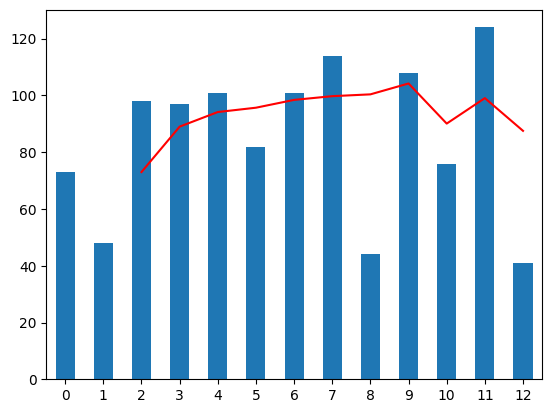

In [84]:
data_00['Duration_converted'].plot(kind='bar')
data_00['Duration_trend'].plot(color='red')